In [1]:
# fashion MNIST https://www.kaggle.com/zalando-research/fashionmnist/data?select=fashion-mnist_train.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

y_train = train['label']
X_train = train.drop(['label'], axis=1)

y_test = test['label']
X_test = test.drop(['label'], axis=1)

labelMap = {0:'T-shirt/top',
            1:'Trouser',
            2:'Pullover',
            3:'Dress',
            4:'Coat',
            5:'Sandal',
            6:'Shirt',
            7:'Sneaker',
            8:'Bag',
            9:'Ankle boot'}

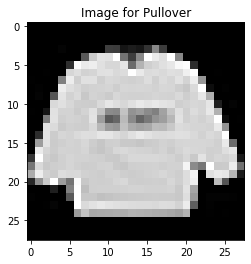

In [2]:
plt.imshow(X_train.values[0].reshape(28,28),cmap=plt.get_cmap('gray'))
plt.title(f'Image for {labelMap[y_train.values[0]]}')
plt.show()

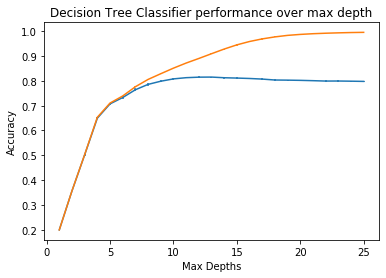

In [3]:
from sklearn.tree import DecisionTreeClassifier

valMeanScores = []
trainMeanScores = []
valStdScores = []
trainStdScores = []
max_depths = range(1,26)
for md in max_depths:
    scores = cross_validate(DecisionTreeClassifier(max_depth=md),
                            X_train,
                            y_train,
                            n_jobs=3,
                            return_train_score=True
                           )
    valMeanScores.append(np.mean(scores['test_score']))
    trainMeanScores.append(np.mean(scores['train_score']))
    valStdScores.append(np.std(scores['test_score']))
    trainStdScores.append(np.std(scores['train_score']))
    
    
plt.errorbar(x=max_depths,
             y=valMeanScores,
             yerr=valStdScores,
             label='Validation scores')
plt.errorbar(x=max_depths,
             y=trainMeanScores,
             yerr=trainStdScores,
             label='Training scores')
plt.xlabel('Max Depths')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier performance over max depth')
plt.legend()
plt.show()

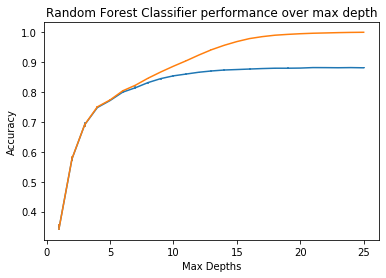

In [4]:
from sklearn.ensemble import RandomForestClassifier

valMeanScores = []
trainMeanScores = []
valStdScores = []
trainStdScores = []

for md in max_depths:
    scores = cross_validate(RandomForestClassifier(max_depth=md),
                            X_train,
                            y_train,
                            n_jobs=3,
                            return_train_score=True
                           )
    valMeanScores.append(np.mean(scores['test_score']))
    trainMeanScores.append(np.mean(scores['train_score']))
    valStdScores.append(np.std(scores['test_score']))
    trainStdScores.append(np.std(scores['train_score']))

plt.errorbar(x=max_depths,
             y=valMeanScores,
             yerr=valStdScores,
             label='Validation scores')
plt.errorbar(x=max_depths,
             y=trainMeanScores,
             yerr=trainStdScores,
             label='Training scores')
plt.xlabel('Max Depths')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier performance over max depth')
plt.legend()
plt.show()